In this colab, we will implement **multiclass MNIST** digit recognition classifier with **decision trees** and **ensemble techniques**.

In [2]:
# plotting utility
import matplotlib.pyplot as plt

# Load MNIST dataset
from sklearn.datasets import fetch_openml

# training three classifiers: decision tree, bagging and random forest.
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model selection utilities for training and test split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# use shuffle-split cross validation for this exercise.
from sklearn.model_selection import ShuffleSplit

# make use of confusion matrix and classification report to evaluate performance
# on the test set.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# the model is defined through pipeline utility.
from sklearn.pipeline import Pipeline

## Loading MNIST Dataset

In [27]:
# Load MNIST data using fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X.shape

(70000, 784)

In [30]:
# Change the data frame X (shape=70000,784) to numpy array of shape (70000,28,28)
X = X.values.reshape(-1,28,28)
X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(56000, 28, 28)
(14000, 28, 28)
(56000,)
(14000,)


Before using the dataset for training and evaluation, we need to flatten it into a vector. After flattening, we have training and test examples
represented with a vector of 784 features. Each feature records pixel intensity in each of 28x28 pixel.

We normalize the pixel intensity by dividing it with the maximum value i.e. 255. In that sense we have each feature value in the range 0 to 1.

In [33]:
# Flatten each input image into a vector of length 784
X_train =X_train.reshape(X_train.shape[0], 28*28)
X_test =X_test.reshape(X_test.shape[0], 28*28)

# Normalizing.
X_train = X_train/255
X_test = X_test/255

In [34]:
print('Shape of training data after flattening',X_train.shape)
print('Shape of testing data after flattening', X_test.shape)

Shape of training data after flattening (56000, 784)
Shape of testing data after flattening (14000, 784)


In [35]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

In [38]:
def train_classifiers(estimator, X_train, y_train, cv, name):
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(
        estimator, X_train, y_train, cv=cv, scoring="f1_macro"
    )
    print(
        f"On an average, {name} model has f1 score of "
        f"{cv_train_score.mean():.3f} +/- {cv_train_score.std( ):.3f} on the training set."
    )

In [39]:
def eval(estimator, X_test, y_test):
    y_pred = estimator.predict(X_test)

    print("# Classification report")
    print(classification_report(y_test, y_pred) )

    print("# Confusion matrix")
    disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, y_pred) )
    disp.plot()
    plt.title('Confusion matrix')
    plt.show()

## Decision trees for MNIST multiclass classification
We instantiate a decision tree classifier with default parameters and train it. The train_classifier function prints mean of cross validated
accuracy and standard deviation of the trained classifier on the training set.

In [40]:
decision_tree_pipeline = Pipeline([("classifier", DecisionTreeClassifier())])
train_classifiers(decision_tree_pipeline, X_train, y_train.ravel(), cv, "decision tree")

C:\Users\91820\AppData\Local\Temp\ipykernel_22744\2374628547.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  train_classifiers(decision_tree_pipeline, X_train, y_train.ravel(), cv, "decision tree")


On an average, decision tree model has f1 score of 0.863 +/- 0.004 on the training set.


# Classification report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.86      0.83      0.85      1380
           3       0.84      0.84      0.84      1433
           4       0.84      0.87      0.85      1295
           5       0.84      0.82      0.83      1273
           6       0.89      0.91      0.90      1396
           7       0.90      0.91      0.91      1503
           8       0.82      0.80      0.81      1357
           9       0.83      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

# Confusion matrix


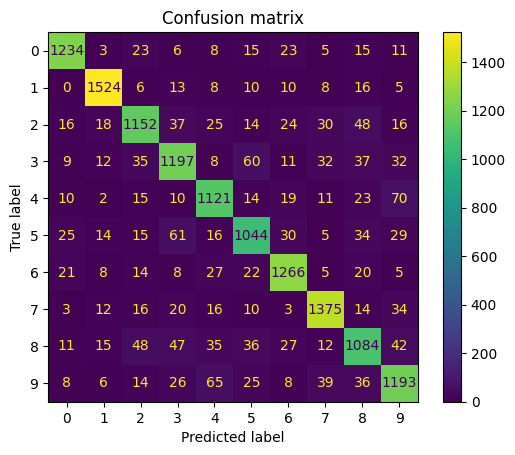

In [41]:
eval (decision_tree_pipeline, X_test, y_test)

## MNIST classification with Bagging
Let's instantiate a bagging classifier object with default parameters and train it.
Observe the mean f1_score and its standard deviation obtained by the classifier based 10-fold cross validation of the training set.

In [43]:
# Too much computing time required.
bagging_pipeline = Pipeline([("classifier", BaggingClassifier())])
train_classifiers(bagging_pipeline, X_train, y_train.ravel(), cv, "bagging")

C:\Users\91820\AppData\Local\Temp\ipykernel_22744\1275847481.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  train_classifiers(bagging_pipeline, X_train, y_train.ravel(), cv, "bagging")


KeyboardInterrupt: 

In [ ]:
eval(bagging_pipeline, X_test, y_test)

# Random forest for MNIST multiclass classification

Let's instantiate a random forest classifier object with default parameters and train it.
Observe the mean f1_score and its standard deviation obtained by the classifier
based 10-fold cross validation of the training set. 

In [ ]:
random_forest_pipeline = Pipeline([("classifier", RandomForestClassifier())])
train_classifiers(
    random_forest_pipeline, X_train, y_train.ravel(), cv, "randomn forest"
)

Let's evaluate a random forest classifier on the test set and obtain classification report containing predicision, recall, f1-score and accuracy for
each class. It also calculates confusion matrix and displays it with ConfusionMatrixDisplay utility.

In [ ]:
eval(random_forest_pipeline, X_test, y_test)

Summary


- We trained three multi-class classifiers for handwritten digit recognition.


- The decision tree classifier is a baseline classifier, which obtained accuracy of 88% on the test set.

- Using bagging and training the same decision tree classifier gave us an increase of 6 percentage point in the accuracy, which translates to
94% accuracy on the test set.


- Finally random forest pushed that further to 97%.

- We can see that how ensemble techniques give better results on the classification task compared to a single classifier.


- With this demonstration, you have added three more powerful tools in your ML toolkit.